#  Data preparation

****As a result of this work, a machine learning model based on random forest algorithm was built to predict real estate prices with high accuracy. The model was realized as follows:****

* Data preparation and analysis:

1. Collecting and exploring data, identifying missing data, processing categorical features.
1. Correlation analysis to identify relationships between features and real estate price.

* Model creation and customization:

1. Implemented a random forest model for price prediction.
1. Customized key hyperparameters using Grid Search to improve accuracy.

* Model Evaluation:

1. The model was validated on test data and showed good results in terms of MAE, RMSE and R² metrics.
1. A feature importance analysis was performed, which helped to understand which factors have the strongest influence on real estate value.

* Integration of the model into the Desktop Application:

1. The model has been integrated into the desktop application, allowing the user to upload real estate data and get price predictions in a user-friendly interface.

**On this project, I improved my skills in data preprocessing, hyperparameter tuning, and visual data analysis. I also learned how to integrate machine learning models into desktop applications, making the model available for real-world use.**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble  import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [9]:
filenames_2023 = [
    r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\data\apartments_pl_2023_08.csv',
    r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\data\apartments_pl_2023_09.csv',
    r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\data\apartments_pl_2023_10.csv',
    r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\data\apartments_pl_2023_11.csv',
    r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\data\apartments_pl_2023_12.csv',
]

filenames_2024 = [
    r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\data\apartments_pl_2024_01.csv',
    r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\data\apartments_pl_2024_02.csv',
    r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\data\apartments_pl_2024_03.csv',
    r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\data\apartments_pl_2024_04.csv',
    r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\data\apartments_pl_2024_05.csv',
    r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\data\apartments_pl_2024_06.csv',
]

all_data = pd.DataFrame()

for i in range(8, 13):
    #month = f'{i:02}'
    year = int(2023)
    df = pd.read_csv(filenames_2023[i - 8])
    df['date'] = year
    all_data = pd.concat([all_data, df], ignore_index=True)


for i in range(1, 7):
    #month = f'{i:02}'
    year = int(2024)
    df = pd.read_csv(filenames_2024[i - 1])
    df['date'] = year
    all_data = pd.concat([all_data, df], ignore_index=True)

df = all_data
df.head(1)

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,date
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.0,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000,2023


In [10]:
df.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price,date
count,195568.000000,195568.000000,160974.000000,193185.000000,163352.000000,195568.000000,195568.000000,195568.000000,195568.000000,195400.000000,194840.000000,195320.000000,195361.000000,195089.000000,190132.00000,195291.000000,1.955680e+05,195568.000000
mean,58.697667,2.679222,3.332414,5.309113,1985.976346,52.026288,19.465989,4.351114,20.672037,0.412651,0.970287,0.516340,0.367560,0.345257,1.44327,0.358114,7.841833e+05,2023.563441
std,21.407206,0.915024,2.531684,3.312234,33.812810,1.335275,1.783264,2.835764,24.325708,0.464193,0.888884,0.498013,0.444673,0.463510,1.10457,0.457679,4.097092e+05,0.495960
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.978999,14.447100,0.010000,0.000000,0.002000,0.001000,0.001000,0.001000,0.001000,0.00400,0.001000,1.500000e+05,2023.000000
25%,44.000000,2.000000,2.000000,3.000000,1967.000000,51.108796,18.523270,2.010000,7.000000,0.176000,0.356000,0.239000,0.156000,0.114000,0.57700,0.142000,5.200000e+05,2023.000000
50%,54.600000,3.000000,3.000000,4.000000,1994.000000,52.194596,19.899434,3.980000,14.000000,0.290000,0.676000,0.393000,0.262000,0.229000,1.12000,0.239000,6.990000e+05,2024.000000
75%,68.550000,3.000000,4.000000,6.000000,2016.000000,52.409006,20.989907,6.150000,24.000000,0.468000,1.237000,0.623000,0.416000,0.409000,2.05500,0.406000,9.300000e+05,2024.000000
max,150.000000,6.000000,29.000000,29.000000,2024.000000,54.606460,23.208873,16.940000,212.000000,4.946000,4.999000,4.970000,4.961000,4.985000,5.00000,4.992000,3.250000e+06,2024.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 195568 entries, 0 to 195567

Data columns (total 29 columns):

 #   Column                Non-Null Count   Dtype  

---  ------                --------------   -----  

 0   id                    195568 non-null  object 

 1   city                  195568 non-null  object 

 2   type                  153307 non-null  object 

 3   squareMeters          195568 non-null  float64

 4   rooms                 195568 non-null  float64

 5   floor                 160974 non-null  float64

 6   floorCount            193185 non-null  float64

 7   buildYear             163352 non-null  float64

 8   latitude              195568 non-null  float64

 9   longitude             195568 non-null  float64

 10  centreDistance        195568 non-null  float64

 11  poiCount              195568 non-null  float64

 12  schoolDistance        195400 non-null  float64

 13  clinicDistance        194840 non-null  float64

 14  postOfficeDistance    195320 non-

# Processing missing values

In [12]:
df['city'].value_counts()

city
warszawa       59246
krakow         29026
wroclaw        20200
gdansk         19210
lodz           15300
bydgoszcz       9547
gdynia          8164
poznan          7705
szczecin        6331
lublin          5704
katowice        5284
radom           2929
czestochowa     2657
bialystok       2464
rzeszow         1801
Name: count, dtype: int64

In [13]:
df.drop(['condition', 'buildingMaterial', 'id'], axis=1, inplace=True)

In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
df['city'].value_counts()

city
warszawa       34414
krakow         16509
wroclaw        12165
gdansk         10071
lodz            7390
bydgoszcz       3996
poznan          3499
gdynia          3356
lublin          3101
szczecin        2995
katowice        2058
bialystok       1462
radom           1381
rzeszow          933
czestochowa      431
Name: count, dtype: int64

In [16]:
df.isnull().sum()

city                    0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
ownership               0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
date                    0
dtype: int64

# Data analysis and visualization

Text(0.5, 1.0, 'Mean price of apartment in Polish cities \n 1e6 =1 000 000 ')

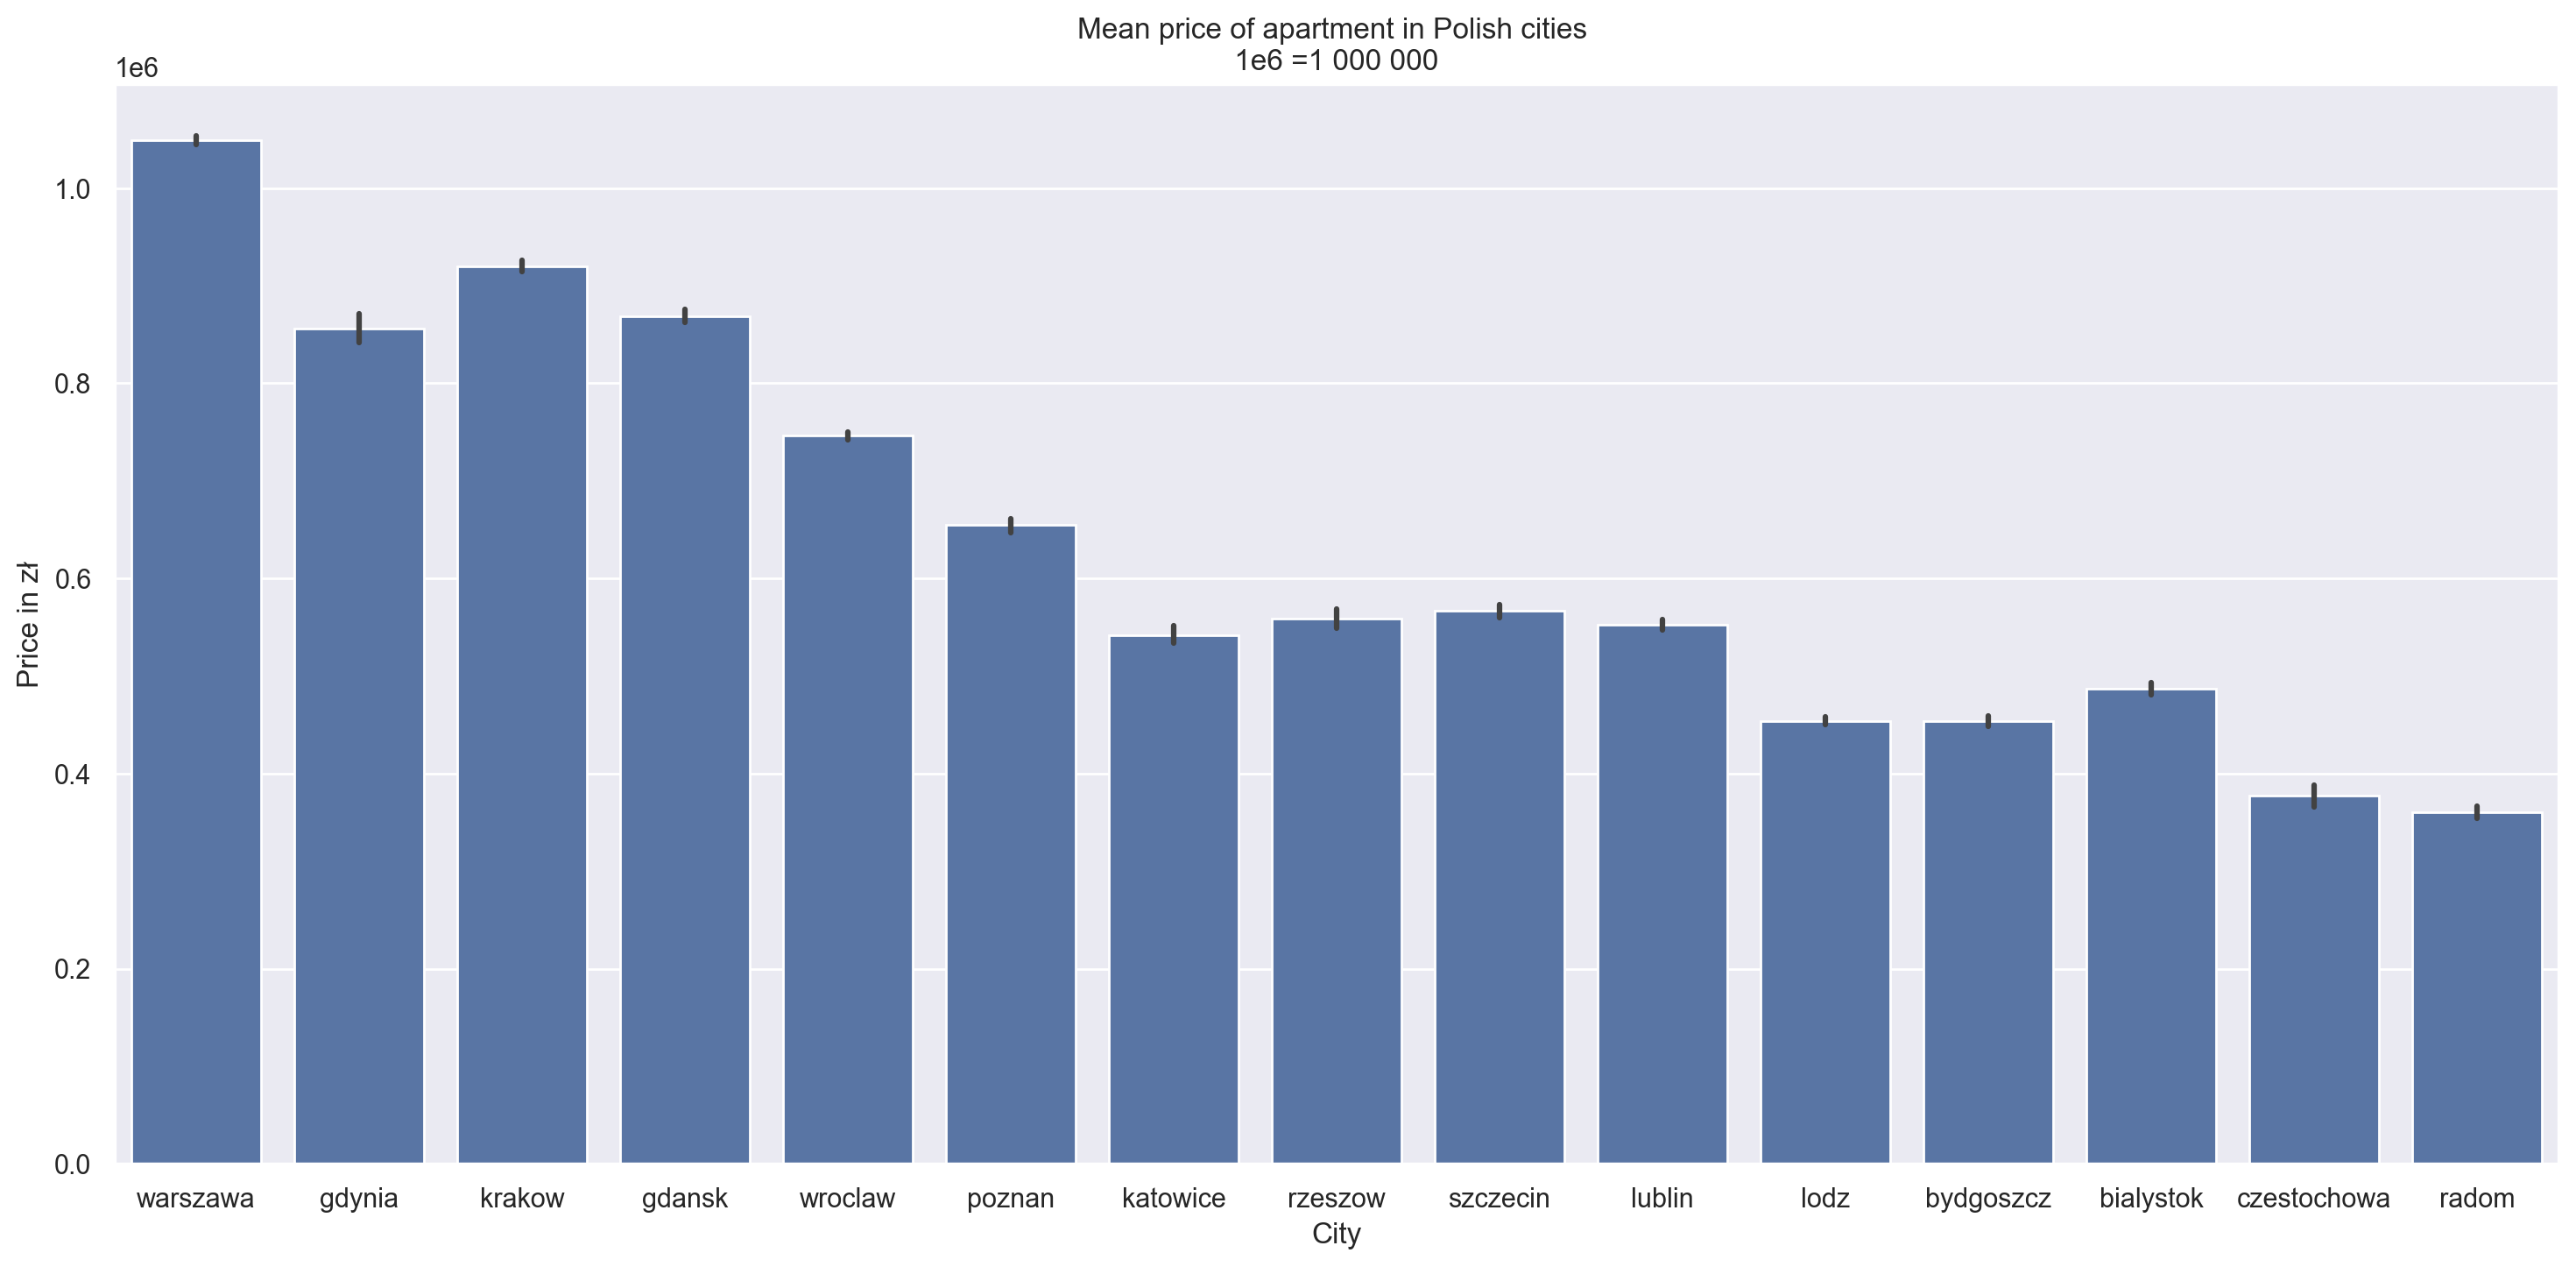

In [17]:
df_sorted = df.sort_values(by='price', ascending=False)

sns.set_theme(style='darkgrid')
sns.set_palette('deep')

plt.figure(figsize=(18,8), dpi=200)
sns.barplot(data=df_sorted,x='city', y='price')
plt.xlabel('City')
plt.ylabel('Price in zł')
plt.title('Mean price of apartment in Polish cities \n 1e6 =1 000 000 ')

Text(0.5, 1.0, 'Mean price of apartment in Polish cities and build year \n 1e6 =1 000 000 ')

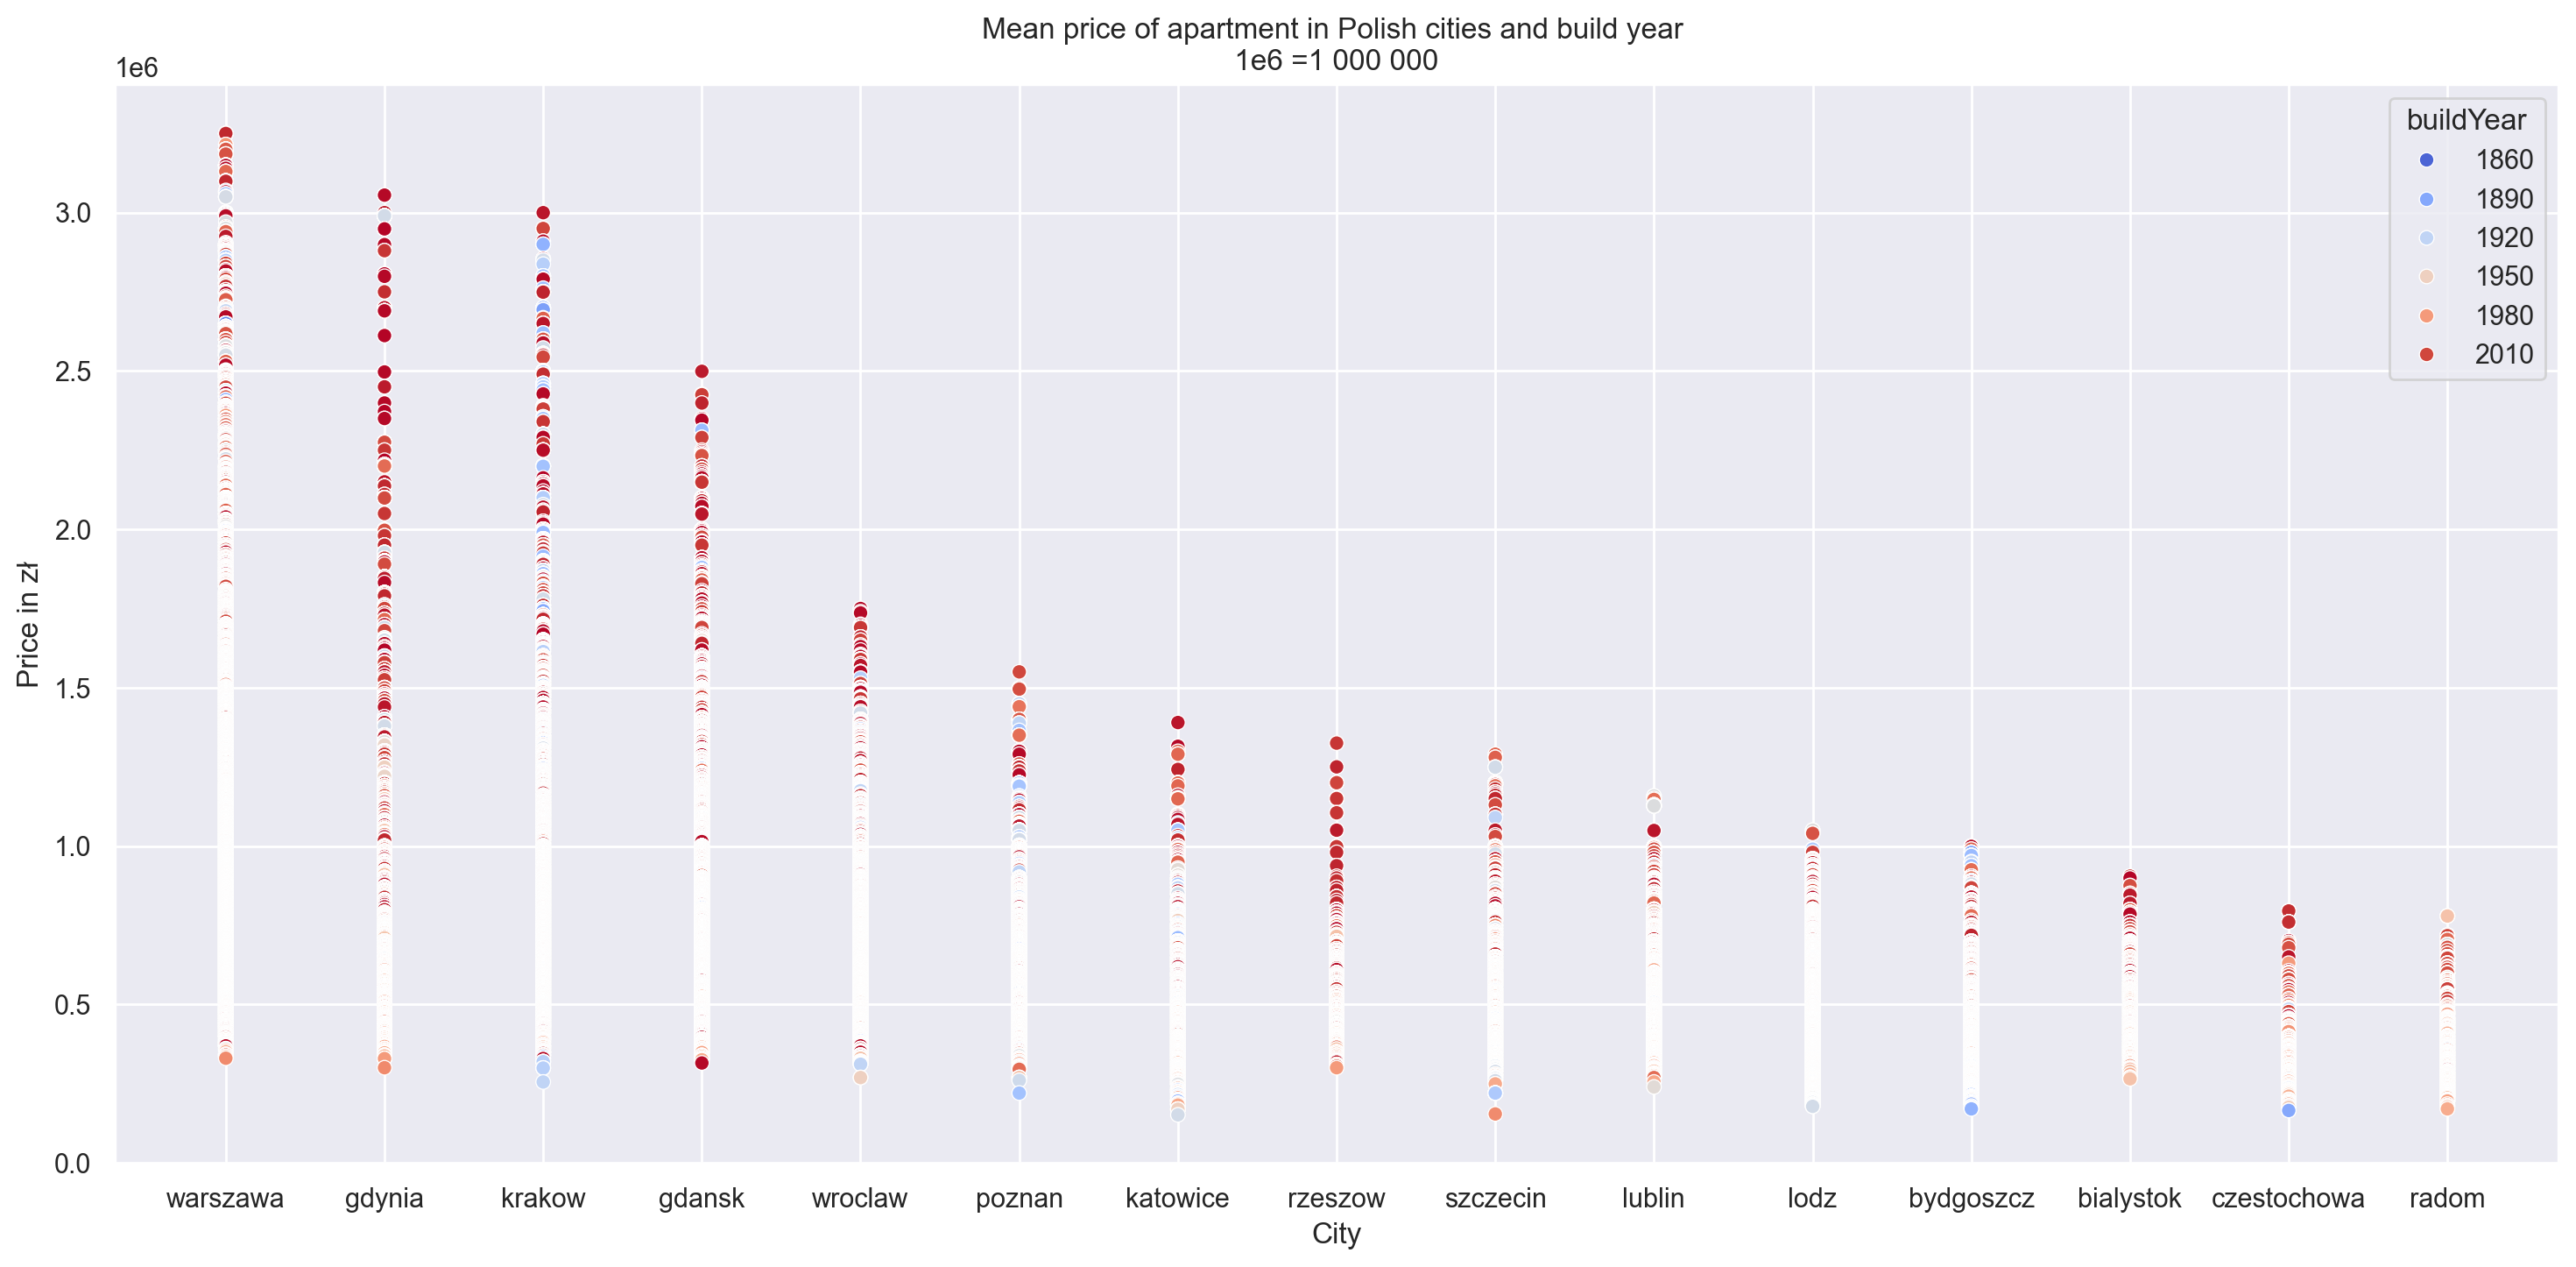

In [18]:
plt.figure(figsize=(18,8), dpi=200)
sns.scatterplot(data=df_sorted,x='city', y='price', hue='buildYear', palette='coolwarm')
plt.xlabel('City')
plt.ylabel('Price in zł')
plt.title('Mean price of apartment in Polish cities and build year \n 1e6 =1 000 000 ')

Text(0.5, 1.0, 'Mean price of apartment in Polish cities and distance to city centre (km) \n 1e6 =1 000 000 ')

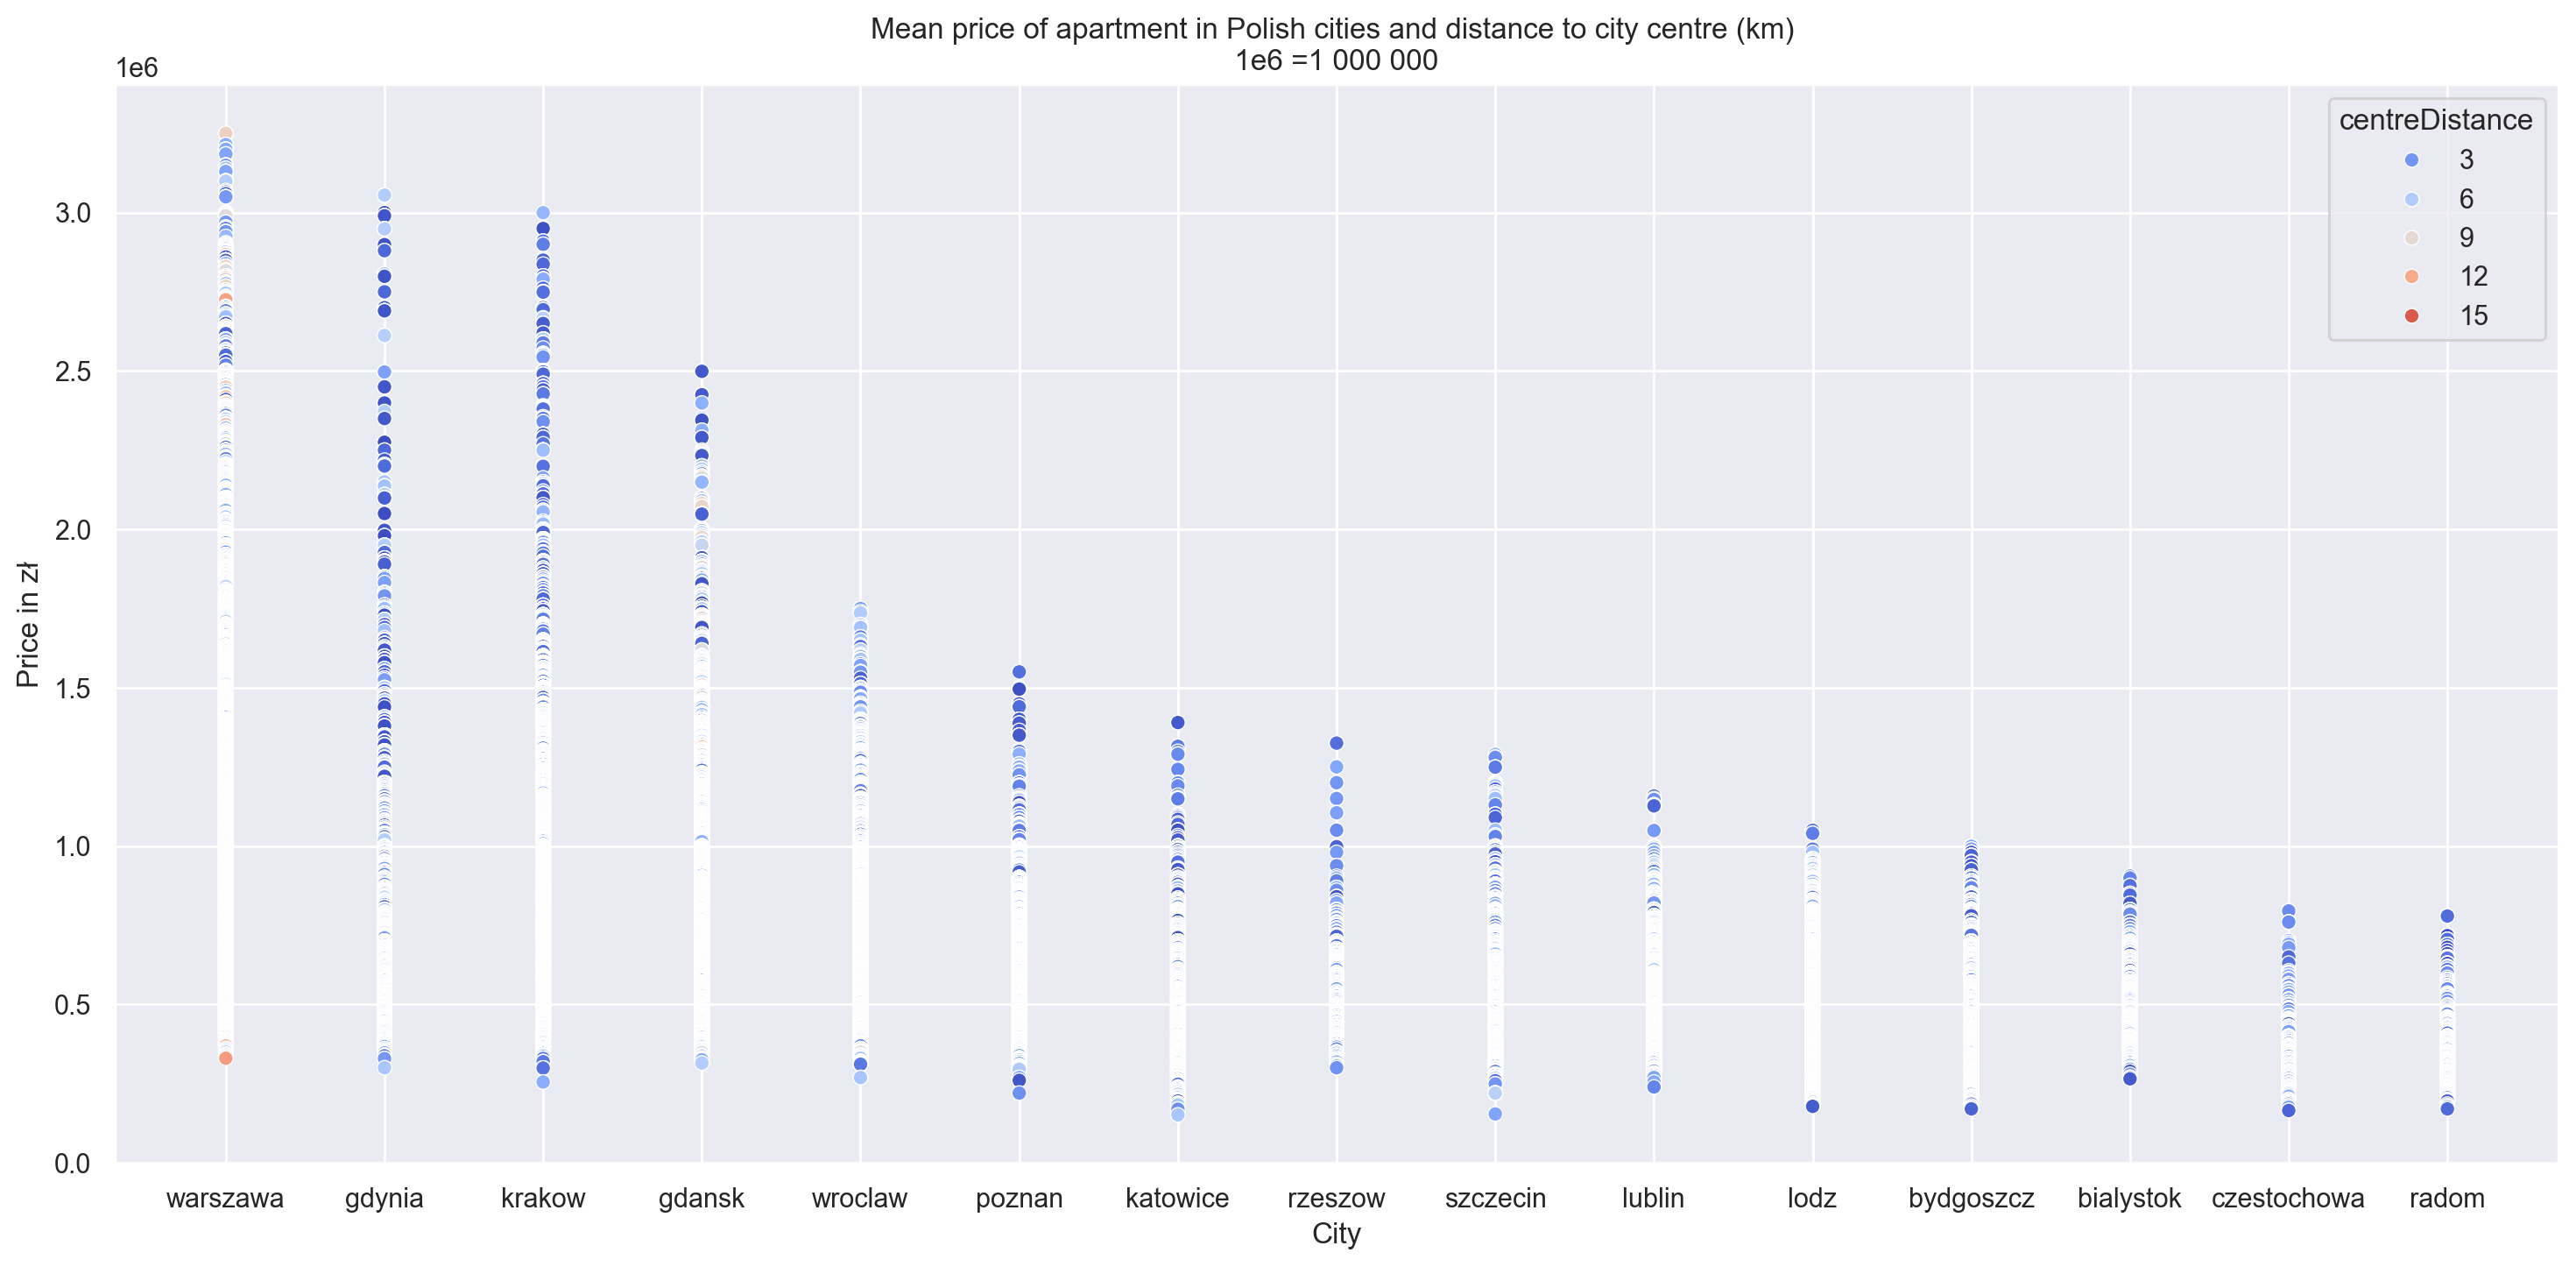

In [19]:
plt.figure(figsize=(18,8), dpi=200)
sns.scatterplot(data=df_sorted, x='city', y='price', hue='centreDistance', palette='coolwarm')
plt.xlabel('City')
plt.ylabel('Price in zł')
plt.title('Mean price of apartment in Polish cities and distance to city centre (km) \n 1e6 =1 000 000 ')

In [20]:
df.drop(['latitude', 'longitude'], axis=1, inplace=True)

# Categorical attribute coding

In [21]:
my_replace = {'yes': 1, 'no': 0}
col = df[['hasParkingSpace', 'hasBalcony','hasElevator', 'hasSecurity', 'hasStorageRoom']]
for i in col:
    df[i] = df[i].map(my_replace)
df.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,poiCount,schoolDistance,...,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,date
5,szczecin,blockOfFlats,63.30,3.0,2.0,4.0,1997.0,4.48,10.0,0.079,...,0.377,0.745,cooperative,1,1,0,0,1,499000,2023
6,szczecin,blockOfFlats,47.45,2.0,2.0,10.0,1974.0,2.99,18.0,0.327,...,1.736,0.277,condominium,0,0,1,0,1,370000,2023
7,szczecin,apartmentBuilding,60.08,2.0,3.0,4.0,2009.0,3.53,8.0,0.572,...,1.945,0.155,condominium,0,1,1,0,0,629000,2023
8,szczecin,blockOfFlats,47.76,2.0,8.0,12.0,1980.0,4.27,6.0,0.345,...,1.879,0.420,condominium,0,1,1,0,1,399000,2023
9,szczecin,tenement,72.09,4.0,2.0,3.0,1890.0,1.30,22.0,0.232,...,0.653,0.199,condominium,1,0,0,0,1,325000,2023


In [22]:
df = pd.get_dummies(df, dtype=int)

In [23]:
df.corr()

,squareMeters,rooms,floor,floorCount,buildYear,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,...,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw,type_apartmentBuilding,type_blockOfFlats,type_tenement,ownership_condominium,ownership_cooperative,ownership_udział
squareMeters,1.000000,0.824253,-0.060924,-0.130364,-0.041896,0.016302,0.061375,0.035660,-0.018298,0.017138,...,-0.011094,0.056709,0.031186,-0.017962,0.085280,-0.190476,0.153519,0.052684,-0.052496,-0.007195
rooms,0.824253,1.000000,-0.028138,-0.077001,-0.019248,0.034588,0.012570,0.050995,0.018173,0.030277,...,0.003352,0.031075,0.002662,-0.020078,0.020943,-0.064503,0.061059,-0.007956,0.008184,-0.007931
floor,-0.060924,-0.028138,1.000000,0.663675,0.088459,-0.014966,0.027214,-0.099219,-0.115997,-0.061679,...,0.021438,-0.033388,0.111584,-0.033005,0.039350,0.095025,-0.170189,-0.112496,0.112642,-0.003898
floorCount,-0.130364,-0.077001,0.663675,1.000000,0.162268,-0.018553,0.021289,-0.133543,-0.163641,-0.070440,...,0.017410,-0.062508,0.179293,-0.038168,0.101924,0.112804,-0.265134,-0.146351,0.146529,-0.004642
buildYear,-0.041896,-0.019248,0.088459,0.162268,1.000000,0.347833,-0.376343,0.275157,0.224868,0.245187,...,0.032415,-0.087880,0.065509,0.006393,0.493632,0.146376,-0.757071,0.063774,-0.063423,-0.013106
centreDistance,0.016302,0.034588,-0.014966,-0.018553,0.347833,1.000000,-0.445166,0.263835,0.392269,0.214537,...,-0.066669,-0.089179,0.385818,-0.093671,0.059925,0.201143,-0.333536,-0.025006,0.025279,-0.009343
poiCount,0.061375,0.012570,0.027214,0.021289,-0.376343,-0.445166,1.000000,-0.322326,-0.356721,-0.336695,...,-0.029813,0.008895,0.064323,-0.002251,-0.081204,-0.217542,0.379464,0.024991,-0.025778,0.027457
schoolDistance,0.035660,0.050995,-0.099219,-0.133543,0.275157,0.263835,-0.322326,1.000000,0.526503,0.636708,...,0.011479,0.020799,-0.081286,0.028899,0.087446,0.054497,-0.171756,0.086941,-0.086881,-0.003092
clinicDistance,-0.018298,0.018173,-0.115997,-0.163641,0.224868,0.392269,-0.356721,0.526503,1.000000,0.435136,...,0.053213,-0.017595,-0.129468,0.109178,0.001230,0.148297,-0.196816,0.036461,-0.036345,-0.004504
postOfficeDistance,0.017138,0.030277,-0.061679,-0.070440,0.245187,0.214537,-0.336695,0.636708,0.435136,1.000000,...,0.052616,-0.032541,-0.043147,0.054469,0.107507,0.028812,-0.160840,0.069467,-0.069435,-0.001894


# Cleaning of unneeded data

In [24]:
df.drop(['type_apartmentBuilding','type_blockOfFlats','floorCount','ownership_cooperative', 'ownership_condominium', 'floor', 'centreDistance','schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance', 'collegeDistance', 'pharmacyDistance', 'hasParkingSpace', 'hasBalcony', 'type_tenement', 'ownership_udział'], axis=1, inplace=True)

# Split into training and test samples

In [25]:
X = df.drop('price', axis = 1)
y = df['price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [27]:
n_estimators = np.arange(1, 300, 1)
max_depth = np.arange(10,30,1)
min_samples_leaf = np.arange(1,5,1)
n_jobs=[-1]
max_features = np.arange(1,15, 1)
bootstrap = [True,False]
oob_score = [True,False]

# Model building and customization

In [ ]:
param_grid = {'n_estimators' : n_estimators,
             'max_features' : max_features,
             'bootstrap':bootstrap,
             'oob_score' : oob_score,
              'n_jobs': n_jobs,
              'min_samples_leaf': min_samples_leaf,
              'max_depth' : max_depth
              }

In [ ]:
rfc = RandomForestRegressor()
grid = RandomizedSearchCV(rfc, param_grid)
#grid = GridSearchCV(rfc, param_grid)
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [28]:
rfc_1 = RandomForestRegressor(max_features = 14, n_estimators = 134, oob_score=False, bootstrap=True, max_depth=28, min_samples_leaf=1,n_jobs=-1)

# Model training

In [29]:
rfc_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=28, max_features=14, n_estimators=134,
                      n_jobs=-1)

In [30]:
predictions_1 = rfc_1.predict(X_test)

# Model evaluation

In [31]:
mean_absolute_error(y_test,predictions_1)

40466.31991310508

In [32]:
np.sqrt(mean_squared_error(y_test,predictions_1))

80147.0373735657

In [33]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, predictions_1)

0.04974460586005444

In [61]:
np.mean(df['price'])

827565.2523298735

# Load model

In [37]:
import joblib
joblib.dump(rfc_1, r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\app\random_forest_model008.pkl')

['C:\\Users\\dkost\\Desktop\\DS_projects\\Poland_appartment\\app\\random_forest_model008.pkl']

In [38]:
rf_loaded = joblib.load(r'C:\Users\dkost\Desktop\DS_projects\Poland_appartment\app\random_forest_model008.pkl')

# Checking the model's work

In [47]:
len(X_test.columns)

24

In [48]:
X_test.columns

Index(['squareMeters', 'rooms', 'buildYear', 'poiCount', 'restaurantDistance',
       'hasElevator', 'hasSecurity', 'hasStorageRoom', 'date',
       'city_bialystok', 'city_bydgoszcz', 'city_czestochowa', 'city_gdansk',
       'city_gdynia', 'city_katowice', 'city_krakow', 'city_lodz',
       'city_lublin', 'city_poznan', 'city_radom', 'city_rzeszow',
       'city_szczecin', 'city_warszawa', 'city_wroclaw'],
      dtype='object')

In [49]:
test_data = np.array([[35,2,2008,5,2,0,0,1,2030,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])
t = np.array([[50.0, 3, 2010, 5, 3.0, False, False, True, 2024, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False]])

In [50]:
predicted_value = rf_loaded.predict(t)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [51]:
print("Predicted value:", round(*predicted_value,2),'zł')

Predicted value: 528928.27 zł
